In [1]:
# Analysis:

# Observed Trend One:
#     As expected, the cities with latitudes closer to the equator have a higher max temperature.
#     Cities north of the equator have lower max temperatures at this time of year due to the tilt of the earth's axis.
#     It is winter in the northern hemisphere.

# Observed Trend Two:
#      There is no correlation between the latitude of a city and humidity, cloudiness and wind speed.

# Observed Trend Three:
#      Although there is no correlation between the latitude of a city and cloudiness, you can see that there is a pattern
#      in the developement of cloud cover. Cloud cover tends to develop in a straight line when charting by latitude.
#       Also, wind speed has no correlation, but there are a few outliers with higher wind speeds the further you are from
#       the equator. Since fewer cities are located above or below 60 degrees, they show on the chart as outliers. More than
#       likely, it is windier the further away you are from the equator.

In [2]:
# Dependencies
import requests

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
import json
import csv

from citipy import citipy


from config import api_key
from pprint import pprint

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Start the list of cities with the 150 largest cities in the world. 
# This will insure that cities will be choosen with large populations.
# Commenting out the next four lines will eliminate the largest cities from the sample.

static_cities = pd.read_csv('largest_cities.csv')

for i, row in static_cities.iterrows():
    city = row['CityName']
    cities.append(city)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
# There should be atleast 500 cities in the sample.

len(cities)


805

In [4]:
# Build query URL and request your results in Farenheit temperatures


url = "http://api.openweathermap.org/data/2.5/weather?"

data = []

city_not_found = []

city_data = []
lat_data = []
lon_data = []
temp_data = []
humidity_data = []
cloud_data = []
wind_data = []

units = 'imperial'

print("Begin data retrieval")
print("-" * 20)

x = 1                  # x keeps track of how many cities weather data have been requested 
y = 0                  # y keeps track of how many cities are being "skipped" or not included in the sampling

for city in cities:
    
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
    
    data = (requests.get(query_url).json())
    
    
    
    print("Processing " + str(x) + ": " + city)

    check_cod = data['cod']
# check_cod is used to determine whether a city has been found on the openweather website.
# cod is set to 200 if the city has been found and 404 if the city has not been found
# Accumulate the data for the city if it has been found.

    if check_cod == 200:
        city_data.append(data['name'])
        lat_data.append(data['coord']['lat'])
        lon_data.append(data['coord']['lon'])
        temp_data.append(data['main']['temp_max'])
        humidity_data.append(data['main']['humidity'])
        cloud_data.append(data['clouds']['all'])
        wind_data.append(data['wind']['speed'])
    else:
        print(city + " not found. Skipping........")
        city_not_found.append(city)
        y += 1
        
    x += 1

x = x - 1
total_processed = x - y

print('\n' + str(x) + " cities were processed for weather data.")
print("The total number of cities with weather data collected is " + str(total_processed) + ".")
print(str(y) + " cities did not have weather data available on the website.\n")

print("End of data retrieval")
print("-" * 21)

Begin data retrieval
--------------------
Processing 1: Tokyo
Processing 2: Delhi
Processing 3: Shanghai
Processing 4: Sao Paulo
Processing 5: Mumbai
Processing 6: Mexico City 
Processing 7: Beijing
Processing 8: Osaka 
Processing 9: Cairo 
Processing 10: New York
Processing 11: Dhaka
Processing 12: Karachi
Processing 13: Buenos Aires
Processing 14: Kolkata
Processing 15: Istanbul
Processing 16: Chongqing
Processing 17: Lagos
Processing 18: Manila
Processing 19: Rio de Janeiro
Processing 20: Guangzhou
Processing 21: Los Angeles
Processing 22: Moscow 
Processing 23: Kinshasa
Processing 24: Tianjin
Processing 25: Paris
Processing 26: Shenzhen
Processing 27: Jakarta
Processing 28: London
Processing 29: Bangalore
Processing 30: Lima
Processing 31: Chennai 
Processing 32: Seoul
Processing 33: Bogotá
Processing 34: Nagoya 
Nagoya  not found. Skipping........
Processing 35: Johannesburg
Processing 36: Bangkok
Processing 37: Hyderabad
Processing 38: Chicago
Processing 39: Lahore
Processing 40:

Processing 295: omsukchan
Processing 296: airai
Processing 297: kamyaran
Processing 298: smolyaninovo
Processing 299: amderma
amderma not found. Skipping........
Processing 300: hasaki
Processing 301: udachnyy
Processing 302: atuona
Processing 303: saldanha
Processing 304: cayenne
Processing 305: geraldton
Processing 306: gra liyia
Processing 307: yumen
Processing 308: gat
Processing 309: saleaula
saleaula not found. Skipping........
Processing 310: codrington
Processing 311: haines junction
Processing 312: gilgit
Processing 313: east london
Processing 314: newport
Processing 315: mildura
Processing 316: grand river south east
grand river south east not found. Skipping........
Processing 317: ornskoldsvik
Processing 318: reinosa
Processing 319: loa janan
Processing 320: mar del plata
Processing 321: pemberton
Processing 322: kuche
kuche not found. Skipping........
Processing 323: bolungarvik
bolungarvik not found. Skipping........
Processing 324: angoche
Processing 325: moerai
Processi

Processing 586: santa fe
Processing 587: eirunepe
Processing 588: mucurapo
Processing 589: manica
Processing 590: jalu
Processing 591: quelimane
Processing 592: stutterheim
Processing 593: kolaras
Processing 594: haibowan
haibowan not found. Skipping........
Processing 595: xichang
Processing 596: takoradi
Processing 597: kawalu
Processing 598: erzin
Processing 599: korop
Processing 600: mujiayingzi
Processing 601: andenes
andenes not found. Skipping........
Processing 602: hobyo
Processing 603: pizarro
Processing 604: atambua
Processing 605: sorkjosen
sorkjosen not found. Skipping........
Processing 606: port hueneme
Processing 607: westport
Processing 608: evensk
Processing 609: kholtoson
Processing 610: bedford
Processing 611: general roca
Processing 612: longhua
Processing 613: buenos aires
Processing 614: ijaki
ijaki not found. Skipping........
Processing 615: amberley
Processing 616: los llanos de aridane
Processing 617: kijang
Processing 618: kieta
Processing 619: hervey bay
Pro

In [5]:
# Save the weather data to a data frame
# Weather_data for cities

weather_data = pd.DataFrame({
    "City":city_data,
    "Latitude":lat_data,
    "Longitude":lon_data,
    "Temperature":temp_data,
    "Humidity":humidity_data,
    "Clouds":cloud_data,
    "Wind":wind_data
})

# Save the names of the cities selected, but have no weather data on the openweathermap website

cities_no_data = pd.DataFrame({
    "City":city_not_found
})

In [6]:
# Display the data frame containing the weather data

weather_data

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind
0,Tokyo,35.68,139.76,41.00,35,20,14.99
1,Delhi,28.65,77.22,50.00,100,20,5.82
2,Shanghai,31.23,121.49,44.60,81,0,4.47
3,Sao Paulo,-23.55,-46.64,80.60,69,75,10.29
4,Mumbai,19.01,72.85,69.80,56,0,16.02
5,Mexico City,19.43,-99.13,84.20,25,5,9.17
6,Beijing,39.91,116.39,14.00,56,44,4.47
7,Osaka,35.95,137.27,2.69,83,8,2.37
8,Cairo,30.06,31.25,50.00,39,0,12.75
9,New York,40.73,-73.99,46.94,40,75,11.41


In [7]:
# Save the weather data frame to a csv file

weather_data.to_csv('weather_cities.csv')

# Save the cities not found to a csv file

cities_no_data.to_csv('cities_not_found.csv')

Text(0.5,0,'Latitude')

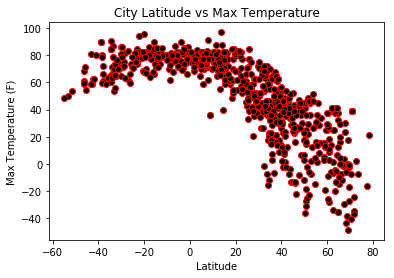

In [8]:
# Chart comparing the latitiude of the city to the max temperature for the day.


x_axis = weather_data['Latitude']
y_axis = weather_data['Temperature']

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "black", edgecolors = "red")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

Text(0.5,0,'Latitude')

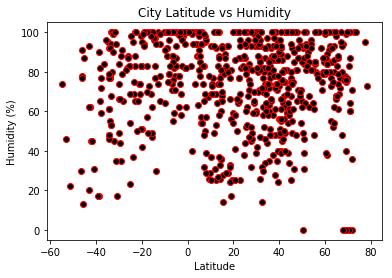

In [9]:
# Chart comparing city latitude and humidity

x_axis = weather_data['Latitude']
y_axis = weather_data['Humidity']

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "black", edgecolors = "red")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

Text(0.5,0,'Latitude')

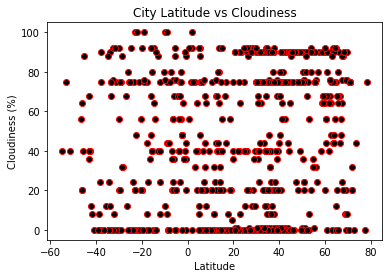

In [10]:
#Chart comparing city latitude and cloudiness

x_axis = weather_data['Latitude']
y_axis = weather_data['Clouds']

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "black", edgecolors = "red")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

Text(0.5,0,'Latitude')

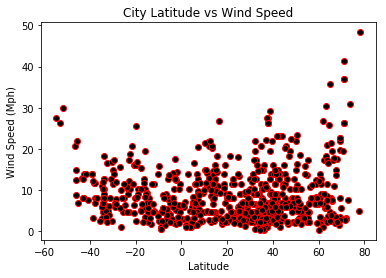

In [11]:
#Chart comparing city latitude and wind speed.

x_axis = weather_data['Latitude']
y_axis = weather_data['Wind']

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "black", edgecolors = "red")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")